<a href="https://colab.research.google.com/github/sgamaa/BAITAP_AI/blob/main/nhan_dien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/data-tien-giay/train',
                                                 shuffle=True,
                                                 target_size=(250, 300), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/data-tien-giay/validation',
                                                 shuffle=True,
                                                 target_size=(250, 300), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 165 images belonging to 11 classes.
Found 0 images belonging to 11 classes.


In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(250,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(loss='mse', optimizer=opt,metrics=['accuracy'],run_eagerly=True)
#model.summary()

In [6]:
history=model.fit(train_dataset,batch_size=30,epochs=50,verbose=1,validation_data=validation_dataset) #VERBOS 0

Epoch 1/50
11/11 [==============================] - 46s 3s/step - loss: 0.1050 - accuracy: 0.0909
Epoch 2/50
11/11 [==============================] - 4s 385ms/step - loss: 0.0998 - accuracy: 0.1455
Epoch 3/50
11/11 [==============================] - 4s 374ms/step - loss: 0.1027 - accuracy: 0.1273
Epoch 4/50
11/11 [==============================] - 4s 374ms/step - loss: 0.0956 - accuracy: 0.2000
Epoch 5/50
11/11 [==============================] - 4s 364ms/step - loss: 0.0882 - accuracy: 0.2485
Epoch 6/50
11/11 [==============================] - 4s 390ms/step - loss: 0.0885 - accuracy: 0.2545
Epoch 7/50
11/11 [==============================] - 4s 383ms/step - loss: 0.0793 - accuracy: 0.3273
Epoch 8/50
11/11 [==============================] - 4s 378ms/step - loss: 0.0816 - accuracy: 0.3212
Epoch 9/50
11/11 [==============================] - 4s 368ms/step - loss: 0.0826 - accuracy: 0.2848
Epoch 10/50
11/11 [==============================] - 4s 369ms/step - loss: 0.0785 - accuracy: 0.3212
E

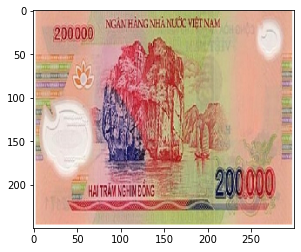

array([3])

In [8]:
filename = '/content/drive/MyDrive/data-tien-giay/validation/200k/b1.jpg'

#img = mpimg.imread(filename)
#imgplot = plt.imshow(img)
#plt.show()

img = load_img(filename,target_size = (250,300))
imgplot = plt.imshow(img)
plt.show()
img = img_to_array(img)
img =  img.reshape(1,250,300,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

In [9]:
#train_dataset.classes
train_dataset.class_indices

{'100': 0,
 '100k': 1,
 '10k': 2,
 '1k': 3,
 '200': 4,
 '200k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [11]:
model.save('money_rec_50epochs.h5')